# **DIABETES DATASET: K-PROTOTYPES CLUSTERING (NON-PATIENTS ONLY)**

<span style="font-size: 20px;">Created by *Oleksiy Danilin*</span>

<span style="font-size: 16px;">In this book, we run a k-prototypes model, based on the original dataset with mixed data types.

## **MODELLING**

In [24]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Diabetes_binary.csv')

In [26]:
# Filter the DataFrame for non-patients
non_patients = df[df['Diabetes_binary'] == 0]

In [27]:
# Save the filtered dataset to a new CSV file
non_patients.to_csv('non_patients_only.csv', index=False)

In [28]:
# Load the new non-patient-only dataset
non_patient_data = pd.read_csv('non_patients_only.csv')

# Display the first 5 rows of the dataset
print(non_patient_data.head())

   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       1         0          1   26       0       0   
1                0       1         1          1   26       1       1   
2                0       0         0          1   26       0       0   
3                0       1         1          1   28       1       0   
4                0       0         0          1   29       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             1       0  ...              1   
1                     0             0       1  ...              1   
2                     0             1       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        3         5        30         0    1    4          6

In [29]:
# Display basic information about the dataset
non_patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35346 entries, 0 to 35345
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       35346 non-null  int64
 1   HighBP                35346 non-null  int64
 2   HighChol              35346 non-null  int64
 3   CholCheck             35346 non-null  int64
 4   BMI                   35346 non-null  int64
 5   Smoker                35346 non-null  int64
 6   Stroke                35346 non-null  int64
 7   HeartDiseaseorAttack  35346 non-null  int64
 8   PhysActivity          35346 non-null  int64
 9   Fruits                35346 non-null  int64
 10  Veggies               35346 non-null  int64
 11  HvyAlcoholConsump     35346 non-null  int64
 12  AnyHealthcare         35346 non-null  int64
 13  NoDocbcCost           35346 non-null  int64
 14  GenHlth               35346 non-null  int64
 15  MentHlth              35346 non-null  int64
 16  Phys

count    35346.000000
mean        27.769960
std          6.187636
min         12.000000
25%         24.000000
50%         27.000000
75%         31.000000
max         98.000000
Name: BMI, dtype: float64


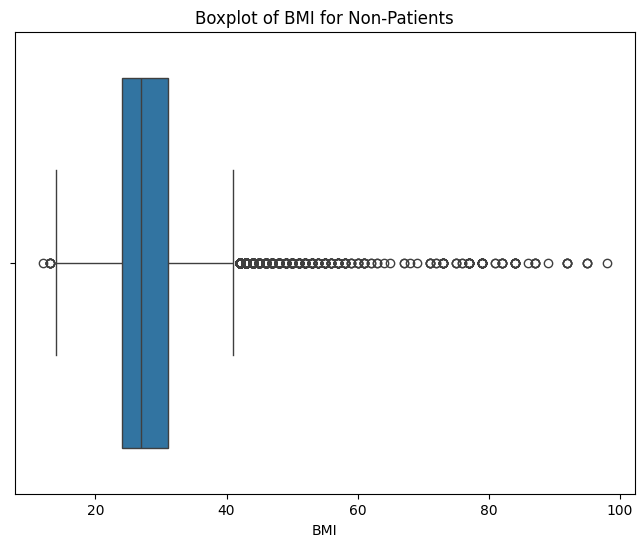

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get summary statistics for the 'BMI' column
numerical_summary = non_patient_data['BMI'].describe()
print(numerical_summary)

# Create a boxplot for the 'BMI' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=non_patient_data['BMI'])
plt.title('Boxplot of BMI for Non-Patients')
plt.xlabel('BMI')
plt.show()

In [31]:
# Summarize key features (for example, Diabetes_binary, HighBP, BMI)
key_features = ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity']

for feature in key_features:
    print(f"Summary of {feature}:\n{non_patient_data[feature].value_counts(normalize=True) * 100}\n")

Summary of Diabetes_binary:
Diabetes_binary
0    100.0
Name: proportion, dtype: float64

Summary of HighBP:
HighBP
0    62.57568
1    37.42432
Name: proportion, dtype: float64

Summary of HighChol:
HighChol
0    61.871216
1    38.128784
Name: proportion, dtype: float64

Summary of BMI:
BMI
27    10.100153
26     8.411136
24     8.269677
25     7.299270
23     6.795677
        ...    
86     0.002829
12     0.002829
68     0.002829
69     0.002829
64     0.002829
Name: proportion, Length: 73, dtype: float64

Summary of Smoker:
Smoker
0    56.767385
1    43.232615
Name: proportion, dtype: float64

Summary of PhysActivity:
PhysActivity
1    77.55333
0    22.44667
Name: proportion, dtype: float64



In [32]:
import pandas as pd
from kmodes.kprototypes import KPrototypes

# Load the non-patient dataset
non_patient_data = pd.read_csv('non_patients_only.csv')

# Ensure categorical columns are at specific indices (adjust based on your dataset)
# Replace these indices with the actual indices of your categorical columns
categorical_indices = [14, 15, 16, 19, 20, 21]  # Update with correct column indices

# Create an instance of KPrototypes with 3 clusters
kproto = KPrototypes(n_clusters=3, init='Cao', random_state=42)

# Fit and predict clusters for non-patients
clusters = kproto.fit_predict(non_patient_data, categorical=categorical_indices)

# Assign the cluster labels back to the dataframe
non_patient_data['Cluster'] = clusters

# Check the first few rows with the cluster labels
print(non_patient_data.head())

   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       1         0          1   26       0       0   
1                0       1         1          1   26       1       1   
2                0       0         0          1   26       0       0   
3                0       1         1          1   28       1       0   
4                0       0         0          1   29       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
0                     0             1       0  ...            0        3   
1                     0             0       1  ...            0        3   
2                     0             1       1  ...            0        1   
3                     0             1       1  ...            0        3   
4                     0             1       1  ...            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  Cluster  
0         5        30         0    1  

In [33]:
# Assuming patient_data is your DataFrame
# Drop the 'Cluster' column and calculate the correlation matrix
correlation_matrix = non_patient_data.drop(columns=['Cluster']).corr()

print(correlation_matrix)

                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary                   NaN       NaN       NaN        NaN   
HighBP                            NaN  1.000000  0.267736   0.082259   
HighChol                          NaN  0.267736  1.000000   0.075509   
CholCheck                         NaN  0.082259  0.075509   1.000000   
BMI                               NaN  0.179766  0.083626   0.017287   
Smoker                            NaN  0.094196  0.082370  -0.016404   
Stroke                            NaN  0.118537  0.092263   0.016798   
HeartDiseaseorAttack              NaN  0.195357  0.169272   0.039182   
PhysActivity                      NaN -0.105897 -0.058198   0.009899   
Fruits                            NaN -0.034118 -0.036526   0.028354   
Veggies                           NaN -0.050500 -0.024395   0.012156   
HvyAlcoholConsump                 NaN  0.015322  0.001146  -0.019549   
AnyHealthcare                     NaN  0.038794  0.043045   0.11

In [34]:
import pandas as pd

# Assuming patient_data is your DataFrame
# Drop the 'Cluster' column and calculate the correlation matrix
correlation_matrix = non_patient_data.drop(columns=['Cluster']).corr()

# Get the absolute values of the correlation coefficients
corr_abs = correlation_matrix.abs()

# Unstack the matrix to convert it to a Series
top_20_corr = corr_abs.unstack()

# Remove self-correlations (correlation of a variable with itself)
top_20_corr = top_20_corr[top_20_corr < 1]

# Exclude duplicates by keeping only pairs where the first variable is less than the second
top_20_corr = top_20_corr[top_20_corr.index.get_level_values(0) < top_20_corr.index.get_level_values(1)]

# Sort the values and get the top 20 correlation coefficients
top_20_corr = top_20_corr.sort_values(ascending=False).head(20)

print(top_20_corr)

GenHlth        PhysHlth                0.505396
DiffWalk       PhysHlth                0.459404
Education      Income                  0.435682
DiffWalk       GenHlth                 0.424350
GenHlth        Income                  0.340573
MentHlth       PhysHlth                0.339271
Age            HighBP                  0.331676
DiffWalk       Income                  0.290840
GenHlth        MentHlth                0.286695
Age            HighChol                0.268542
HighBP         HighChol                0.267736
Education      GenHlth                 0.266044
GenHlth        HighBP                  0.257796
Fruits         Veggies                 0.244325
GenHlth        PhysActivity            0.240292
Income         PhysHlth                0.237436
DiffWalk       PhysActivity            0.233690
AnyHealthcare  NoDocbcCost             0.229176
GenHlth        HeartDiseaseorAttack    0.219935
DiffWalk       MentHlth                0.216492
dtype: float64


In [35]:
# Check the number of patients in each cluster with percentage shares
cluster_counts = non_patient_data['Cluster'].value_counts()
total_non_patients = len(non_patient_data)
cluster_percentages = (cluster_counts / total_non_patients) * 100

# Combine counts and percentages
cluster_summary = pd.DataFrame({
    'Count': cluster_counts,
    'Percentage (%)': cluster_percentages
})

# Print the cluster summary
print("Cluster counts and percentage shares:\n", cluster_summary)

# Summary statistics for numerical columns grouped by cluster
numerical_summary = non_patient_data.groupby('Cluster').mean()
print("\nNumerical summary by cluster:\n", numerical_summary)

# Summary for categorical columns (mode for each categorical column per cluster)
categorical_summary = non_patient_data.groupby('Cluster').agg(lambda x: x.mode()[0])
print("\nCategorical summary by cluster:\n", categorical_summary)

Cluster counts and percentage shares:
          Count  Percentage (%)
Cluster                       
0        17006       48.112941
2        13596       38.465456
1         4744       13.421604

Numerical summary by cluster:
          Diabetes_binary    HighBP  HighChol  CholCheck        BMI    Smoker  \
Cluster                                                                        
0                    0.0  0.417559  0.424144   0.961367  28.733741  0.442020   
1                    0.0  0.529511  0.422639   0.961636  39.064503  0.427066   
2                    0.0  0.265887  0.313254   0.950794  22.623492  0.422036   

           Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  ...  \
Cluster                                                          ...   
0        0.031930              0.079913      0.769787  0.618782  ...   
1        0.030776              0.081577      0.656830  0.570194  ...   
2        0.032215              0.060680      0.824139  0.686084  ...   

         Any

In [ ]:
## **Visualizations**

## **Visualizations**

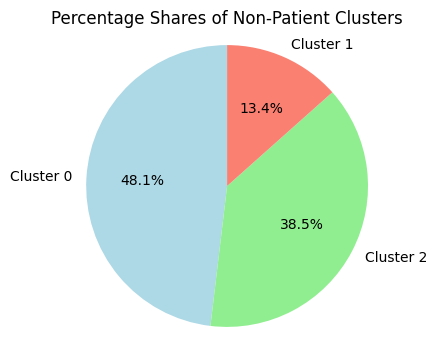

In [41]:
# Sample data for cluster counts and percentage shares
clusters = ['Cluster 0', 'Cluster 2', 'Cluster 1']
counts = [17111, 14352, 3883]
percentages = [48.11, 38.47, 13.42]

# Create a pie chart for percentage shares
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=clusters, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Percentage Shares of Non-Patient Clusters')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

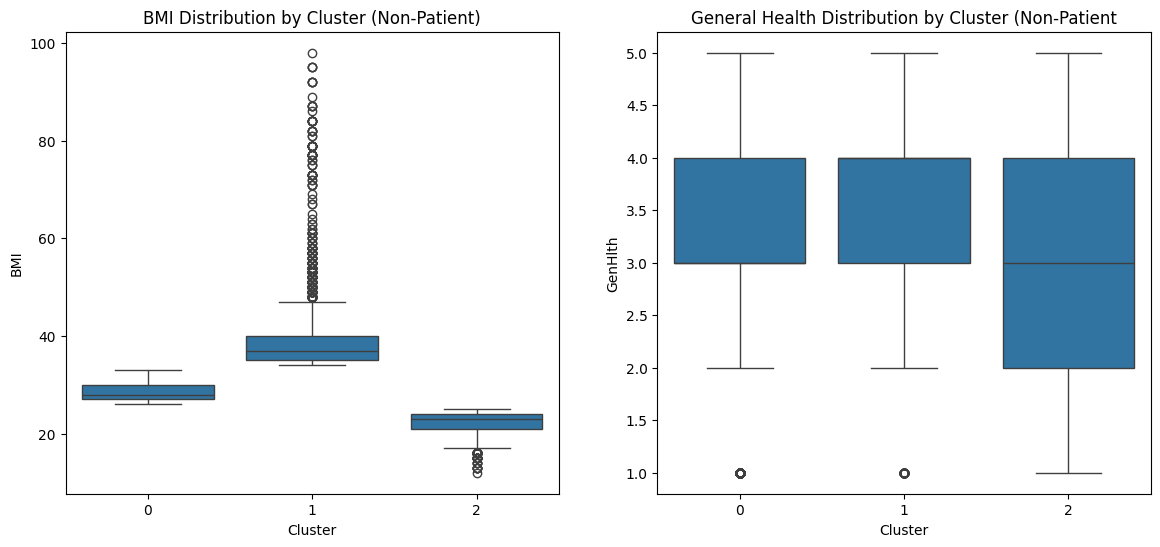

In [38]:
import seaborn as sns

# Assuming 'patient_data' has a column 'Cluster' and other numerical features
# Replace 'patient_data' with your actual DataFrame containing the clusters

# Create box plots for BMI and GenHlth
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Cluster', y='BMI', data=non_patient_data, ax=axes[0])
axes[0].set_title('BMI Distribution by Cluster (Non-Patient)')

sns.boxplot(x='Cluster', y='GenHlth', data=patient_data, ax=axes[1])
axes[1].set_title('General Health Distribution by Cluster (Non-Patient')

plt.show()

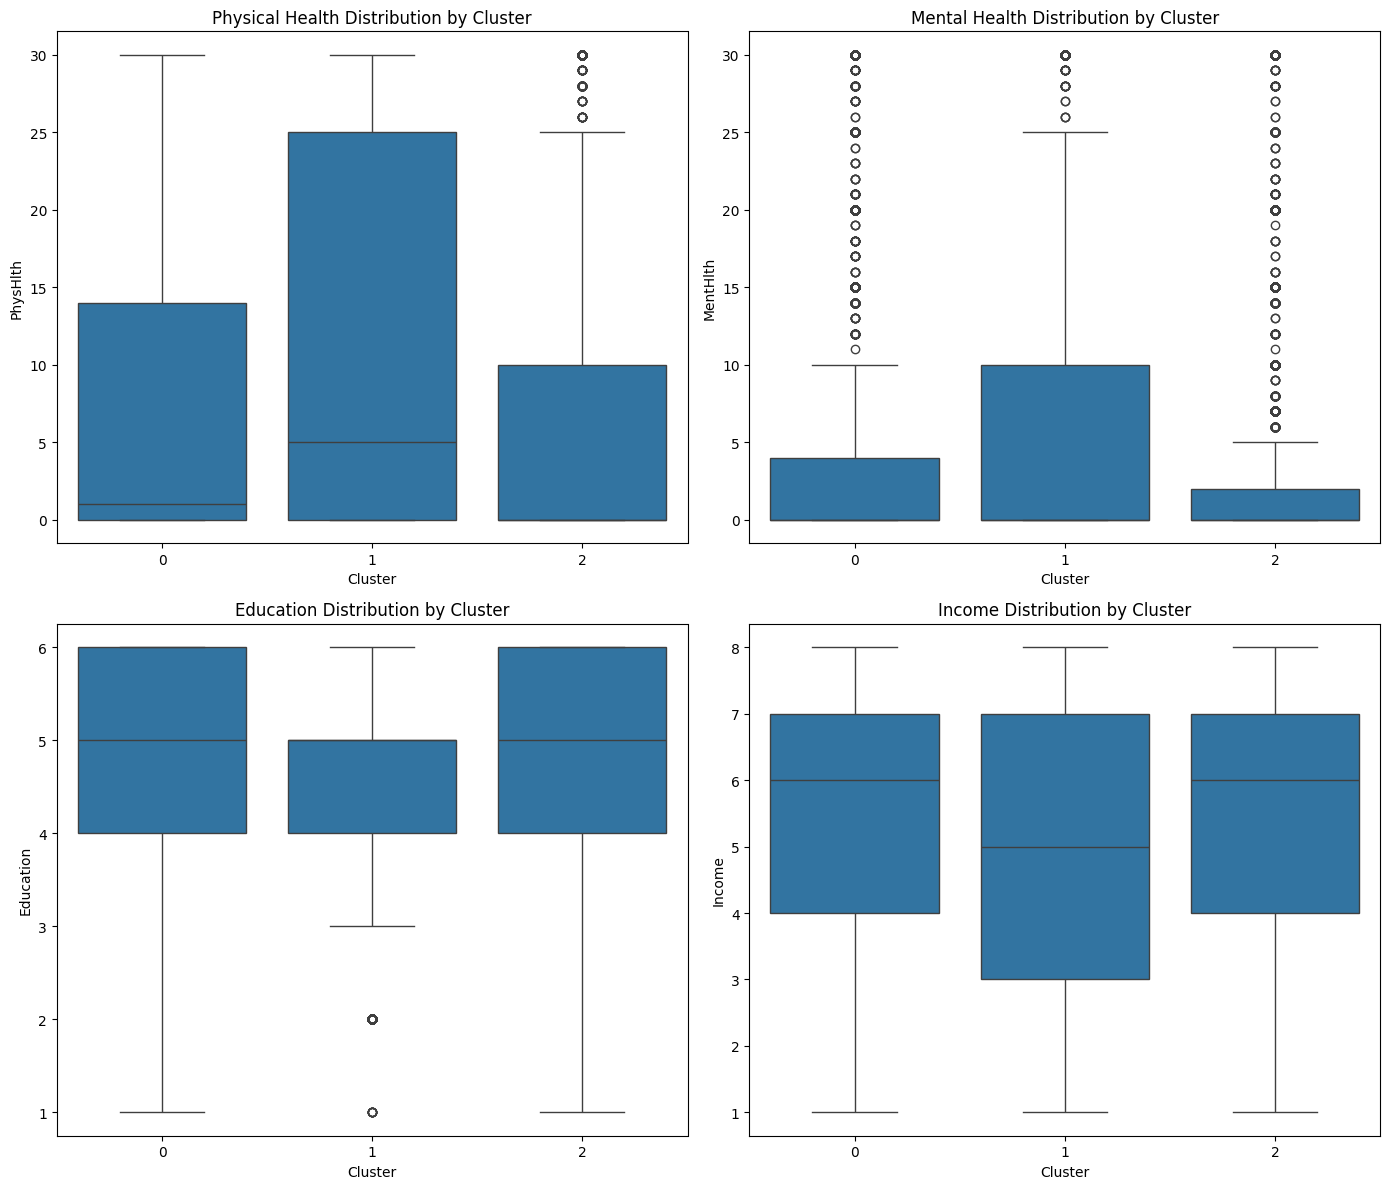

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'patient_data' has a column 'Cluster' and other numerical features

# Create subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Box plot for Physical Health by Cluster
sns.boxplot(x='Cluster', y='PhysHlth', data=patient_data, ax=axes[0, 0])
axes[0, 0].set_title('Physical Health Distribution by Cluster')

# Box plot for Mental Health by Cluster
sns.boxplot(x='Cluster', y='MentHlth', data=patient_data, ax=axes[0, 1])
axes[0, 1].set_title('Mental Health Distribution by Cluster')

# Box plot for Education by Cluster
sns.boxplot(x='Cluster', y='Education', data=patient_data, ax=axes[1, 0])
axes[1, 0].set_title('Education Distribution by Cluster')

# Box plot for Income by Cluster
sns.boxplot(x='Cluster', y='Income', data=patient_data, ax=axes[1, 1])
axes[1, 1].set_title('Income Distribution by Cluster')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

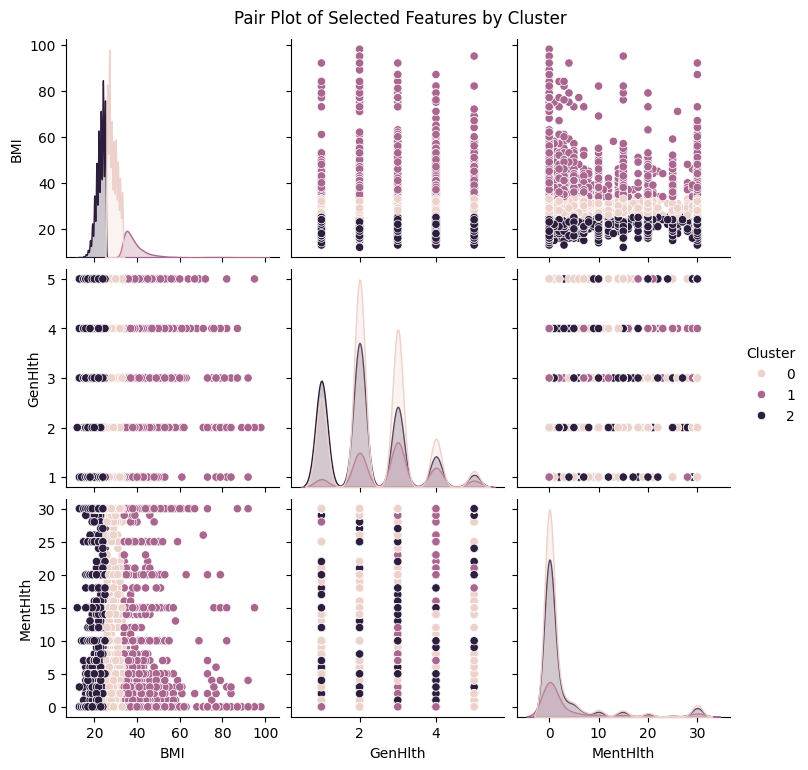

In [39]:
sns.pairplot(non_patient_data, hue='Cluster', vars=['BMI', 'GenHlth', 'MentHlth'])
plt.suptitle('Pair Plot of Selected Features by Cluster', y=1.02)
plt.show()

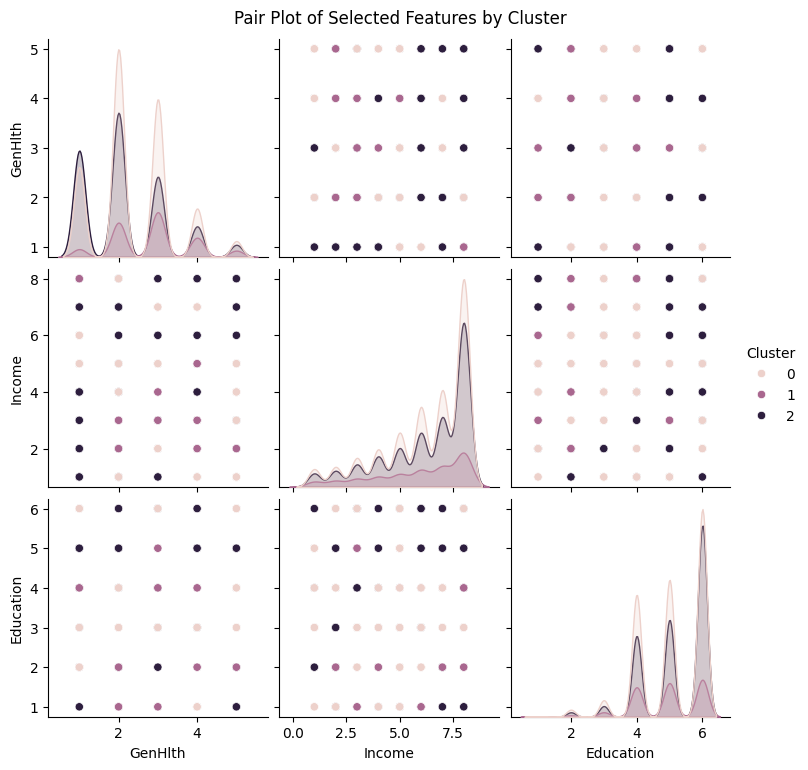

In [40]:
sns.pairplot(non_patient_data, hue='Cluster', vars=['GenHlth', 'Income', 'Education'])
plt.suptitle('Pair Plot of Selected Features by Cluster', y=1.02)
plt.show()

## **CLUSTERS' DESCRIPTION**

Cluster 0 (48.11% of non-patients):
Health Characteristics:

Moderate rates of High Blood Pressure (41.8%) and High Cholesterol (42.4%).
Average BMI is 28.73, placing this group in the overweight range.
44.2% are smokers, which is slightly higher than other clusters.
3.2% have experienced a Stroke, and 8.0% have Heart Disease or Heart Attack.
76.98% report engaging in regular Physical Activity.
61.9% eat fruits daily, and 83.2% eat vegetables daily, indicating relatively good diet habits.
General Health:

Average General Health rating is 2.41 (closer to good).
The average number of poor Mental Health days is 2.85, and poor Physical Health days is 3.51.
DiffWalk (Difficulty Walking) is moderate at 13.1%.
Other Factors:

95.3% have access to healthcare, and 8.0% report not seeing a doctor due to cost.
Gender is almost balanced, with 50.4% female.
The average Age category is 7.92, corresponding to the 55-59 years range.
Education and Income are moderate, with 5.06 for Education and 6.24 for Income (middle-range education and income levels).


Cluster 1 (13.42% of non-patients):
Health Characteristics:

Higher rates of High Blood Pressure (52.9%) compared to other clusters, but High Cholesterol (42.3%) is average.
Average BMI is 39.06, indicating severe obesity.
42.7% are smokers, and 3.1% have experienced a Stroke.
8.2% have Heart Disease or Heart Attack.
Physical Activity levels are lower at 65.7%, and Fruit consumption is lower at 57.0%, while Vegetable consumption is 73.4%.
General Health:

Average General Health rating is 2.84 (leaning toward fair health).
This cluster has the highest number of poor Mental Health days at 4.21 and poor Physical Health days at 5.38 per month.
DiffWalk is significantly higher, with 25.5% reporting difficulty walking.
Other Factors:

93.5% have access to healthcare, and 11.9% report not seeing a doctor due to cost.
Gender is skewed toward males (58.8%).
The average Age category is 7.23, corresponding to the 50-54 years range.
Education and Income are lower, with 4.94 for Education and 5.84 for Income, suggesting lower education and income levels.

Cluster 2 (38.47% of non-patients):
Health Characteristics:

Low rates of High Blood Pressure (26.6%) and High Cholesterol (31.3%).
Average BMI is 22.62, placing this group in the normal weight range.
42.2% are smokers, similar to the other clusters.
3.2% have experienced a Stroke, and 6.1% have Heart Disease or Heart Attack.
82.4% report engaging in regular Physical Activity, the highest among the clusters.
68.6% eat fruits daily, and 89.6% eat vegetables daily, showing strong diet habits.
General Health:

Average General Health rating is 2.19 (better than other clusters).
The number of poor Mental Health days is 2.87, and poor Physical Health days is 3.26, both slightly better than Cluster 0.
DiffWalk is the lowest among the clusters at 9.6%.
Other Factors:

95.2% have access to healthcare, and 7.1% report not seeing a doctor due to cost.
Gender skews male with 64.4% being male.
The average Age category is 7.82, corresponding to the 55-59 years range.
Education is moderate at 5.20, and Income is relatively high at 6.25, suggesting middle-to-higher education and income levels.

## **KEY INSIGHTS**

Cluster 0 represents the largest group with moderate rates of health issues like high blood pressure and cholesterol, and an overweight BMI. They have good physical activity levels and a balanced gender distribution.
Cluster 1 has the highest rate of high blood pressure, with severe obesity (BMI 39). This cluster also shows higher rates of difficulty walking and poor mental and physical health.
Cluster 2 shows better overall health, with the lowest rates of high blood pressure and cholesterol, a normal BMI, and the highest levels of physical activity and fruit/vegetable consumption. This group is younger on average, mostly male, and has better health outcomes overall.

## **RISK ASSESSMENT**

To assess the risk of contracting prediabetes or type II diabetes for each cluster, we need to analyze the characteristics that are known to be risk factors for diabetes and how they manifest in each group. Common risk factors include:

BMI (Overweight/Obesity): Higher BMI increases the risk of developing type II diabetes.
High Blood Pressure (Hypertension): Individuals with high blood pressure are at greater risk.
High Cholesterol: Elevated cholesterol levels are associated with a higher diabetes risk.
Physical Inactivity: Lack of physical activity increases the risk of insulin resistance, a precursor to diabetes.
Smoking: Smoking is linked to a higher risk of diabetes.
Age: Risk increases with age, especially after 45 years.
Poor Diet (low fruit/vegetable consumption): Diets low in fruits and vegetables can contribute to diabetes risk.
General Health: Poor self-rated general health is often correlated with chronic conditions like diabetes.
Mental and Physical Health (days of poor health): Poor mental and physical health can be indicative of lifestyle factors and comorbidities that increase diabetes risk.
Let's break down the diabetes risk for each cluster based on these factors:

Cluster 0 (48.11% of non-patients):
BMI: 28.73 (Overweight, close to obesity) → Moderate risk
High Blood Pressure (41.8%) → Moderate risk
High Cholesterol (42.4%) → Moderate risk
Physical Activity (76.98%) → Protective factor (high physical activity reduces risk)
Smokers (44.2%) → Moderate risk (smoking contributes to diabetes risk)
Age: Average age category is 7.92 (~55-59 years) → Moderate risk (age over 45 increases risk)
Fruit Consumption (61.9%) and Vegetable Consumption (83.2%) → Protective factor (healthy diet reduces risk)
General Health: Rated at 2.41 (closer to good) → Indicates lower risk compared to those with poorer health.
Risk Assessment:

Moderate risk for developing type II diabetes. Despite relatively good levels of physical activity and diet, the higher rates of hypertension, cholesterol, and BMI in the overweight range elevate the risk for this cluster. The high smoking rate also contributes to this risk.

Cluster 1 (13.42% of non-patients):
BMI: 39.06 (Severely obese) → Very high risk (severe obesity is a strong risk factor for diabetes)
High Blood Pressure (52.9%) → High risk
High Cholesterol (42.3%) → Moderate risk
Physical Activity (65.7%) → Moderate risk (lower physical activity compared to other clusters)
Smokers (42.7%) → Moderate risk
Age: Average age category is 7.23 (~50-54 years) → Moderate risk
Fruit Consumption (57.0%) and Vegetable Consumption (73.4%) → Moderate risk (lower consumption compared to other clusters)
General Health: Rated at 2.84 (leaning toward fair health) → Indicates higher risk due to poorer overall health.
Poor Mental and Physical Health days: Higher number of poor health days (Mental: 4.21, Physical: 5.38) → High risk, indicating comorbidities and lifestyle issues.
Risk Assessment:

High to very high risk for developing type II diabetes. The combination of severe obesity, high blood pressure, and lower physical activity significantly increases the risk. Additionally, the poorer general health and mental/physical health indicators suggest this group is at greater risk for developing chronic diseases, including diabetes.

Cluster 2 (38.47% of non-patients):
BMI: 22.62 (Normal weight) → Low risk
High Blood Pressure (26.6%) → Low risk
High Cholesterol (31.3%) → Low risk
Physical Activity (82.4%) → Protective factor (high physical activity reduces risk)
Smokers (42.2%) → Moderate risk
Age: Average age category is 7.82 (~55-59 years) → Moderate risk
Fruit Consumption (68.6%) and Vegetable Consumption (89.6%) → Protective factor (healthy diet reduces risk)
General Health: Rated at 2.19 (better than other clusters) → Lower risk
Poor Mental and Physical Health days: Mental: 2.87, Physical: 3.26 → Lower risk compared to other clusters.
Risk Assessment:

Low to moderate risk for developing type II diabetes. The normal BMI, high physical activity, and good diet in this group are protective factors. While age and smoking remain risks, the overall health indicators suggest a lower likelihood of developing diabetes compared to other clusters.

Summary of Diabetes Risk by Cluster:
Cluster 1: High to very high risk due to severe obesity, high blood pressure, and poorer overall health. This cluster faces the most significant risk of developing prediabetes or type II diabetes.
Cluster 0: Moderate risk due to overweight BMI, moderate hypertension and cholesterol, and smoking rates, although good physical activity and diet habits offer some protection.
Cluster 2: Low to moderate risk due to normal BMI, high physical activity, and healthy diet, with the primary risk factors being age and smoking.

## **POLICY IMPLICATIONS**

To address each cluster in terms of treatment strategies and insurance policy recommendations, it is essential to consider both the clinical characteristics (such as BMI, physical activity, smoking, and general health) and the socio-economic factors that affect health behaviors and access to care (e.g., income, education, healthcare access). Each cluster requires a tailored approach to ensure effective prevention, treatment, and financial planning.

Cluster 0 (Moderate Risk, 48.11% of non-patients):
Key Characteristics:

Overweight (BMI = 28.73): While this group is at lower risk than Cluster 1, they are still in the overweight range, which poses a moderate risk.
Moderate rates of hypertension (41.8%) and high cholesterol (42.4%).
Physical activity is high (76.98%), and diet is relatively healthy, which offers protective factors.
Treatment Approach:
Weight Management:

Weight loss interventions should still be promoted to bring BMI into the normal range (especially for individuals on the higher end of overweight).
Health coaching or nutrition counseling could help refine dietary habits and encourage incremental weight loss.
Monitoring and Prevention:

Regular screening for prediabetes, hypertension, and cholesterol levels to monitor for any changes.
Emphasize preventive care (annual checkups, blood tests, cholesterol screening) to catch any early signs of metabolic syndrome or diabetes.
Behavioral Interventions:

Although this group has good physical activity levels, further encouragement of regular exercise and dietary improvements (increased fruit and vegetable consumption) will help reduce risk further.
Smoking cessation programs for the significant proportion who are smokers (44.2%).
Insurance Policy Recommendations:
Preventive Care Coverage:

Full coverage for preventive screenings for diabetes and cardiovascular diseases (e.g., blood tests for fasting glucose, cholesterol, etc.).
Subsidies for gym memberships or digital health coaching apps that encourage weight loss and physical activity.
Smoking Cessation Programs:

Providing free smoking cessation programs or medication coverage to encourage individuals to quit smoking, which could reduce long-term health risks and costs.
Tiered Insurance Premiums:

For individuals actively participating in wellness programs or maintaining a healthy weight, offer premium discounts or lower deductibles.
Encourage further use of preventive services by offering free health checks as part of the plan.

Cluster 1 (High to Very High Risk, 13.42% of non-patients):
Key Characteristics:

Severely Obese (BMI = 39.06): This group faces the highest risk of developing diabetes due to severe obesity.
High rates of hypertension (52.9%) and fair-to-poor general health.
Physical inactivity (only 65.7% are physically active).
Poor mental and physical health days are high, indicating comorbidities and lifestyle challenges.
Treatment Approach:
Weight Management:

Intensive weight loss programs (lifestyle interventions, counseling, diet modifications, and exercise plans).
Consider medication (like metformin or weight-loss drugs) to help manage obesity and prevent the onset of diabetes.
Bariatric surgery could be recommended for severe cases where BMI is over 40, as it has been shown to improve outcomes for obese individuals at high risk for diabetes.
Hypertension and Cholesterol Management:

Medication to control blood pressure and cholesterol (e.g., statins for cholesterol).
Regular blood pressure monitoring and interventions for cardiovascular risk management.
Dietary counseling to improve nutrition, focusing on reducing saturated fats and increasing fruit and vegetable intake.
Physical Activity:

Initiating exercise programs that are tailored to obese individuals (e.g., low-impact activities like swimming or walking).
Group or supervised fitness programs may provide support and accountability.
Mental Health:

Addressing mental health issues is critical, as poor mental health can worsen diabetes risk. Integrating counseling services or behavioral health interventions can help address underlying issues related to lifestyle management.
Use of telemedicine and support groups to make mental health resources more accessible.
Insurance Policy Recommendations:
Incentivized Weight Loss Programs:

Coverage for weight loss programs, both in-person and digital (e.g., apps for tracking nutrition and fitness).
Offering discounts or incentives for meeting weight loss or fitness goals, which can prevent the development of costly chronic diseases like diabetes.
Mental Health and Wellness:

Expanded mental health coverage for counseling and support, given the high rate of poor mental health days in this cluster.
Encourage preventive care through wellness visits focused on mental and physical health.
Risk-Based Premiums:

Since this group faces the highest risk for diabetes, it may be necessary to develop premium adjustments based on health factors like BMI and hypertension levels.
Lower copays or deductibles for preventive services, such as weight management programs, hypertension monitoring, and diabetes screenings, to encourage proactive health management.

Cluster 2 (Low to Moderate Risk, 38.47% of non-patients):
Key Characteristics:

Normal weight (BMI = 22.62): This group is at a lower risk for diabetes due to a healthy BMI.
Low rates of hypertension (26.6%) and cholesterol (31.3%).
High physical activity (82.4%) and good diet (high fruit/vegetable consumption).
Younger age (~55-59 years) and good overall health contribute to lower risk.
Treatment Approach:
Maintenance of Healthy Habits:

Continued promotion of physical activity and a healthy diet to maintain their current low risk. Community wellness programs or exercise groups could reinforce these behaviors.
Regular check-ups to ensure that any subtle changes (e.g., weight gain, increase in cholesterol) are caught early.
Age-Related Monitoring:

Although this cluster has a healthy profile, as they age, they should be regularly screened for prediabetes and other age-related conditions.
Encourage flu shots, vaccinations, and other preventive care as they age to avoid health complications that may indirectly affect their diabetes risk.
Targeted Health Interventions:

Although smoking rates are lower than in other clusters, smoking cessation should still be encouraged for the remaining smokers (42.2%).
Screen for mental health concerns even in a generally healthy population to ensure continued well-being.
Insurance Policy Recommendations:
Wellness Incentives:

Offering premium discounts or incentives for continued physical activity and regular health checkups. This could include rewards for tracking steps or fitness activities via health apps.
Provide cash-back incentives or reduced copays for individuals maintaining normal weight and healthy lifestyles.
Preventive Care and Aging:

Focus on preventive care coverage for conditions that arise with age (e.g., cardiovascular disease, hypertension).
Provide free access to age-specific screening programs for diabetes and other metabolic disorders.
Smoking Cessation:

Continue offering full coverage for smoking cessation programs to help lower the proportion of smokers.

Each cluster can be approached differently in terms of treatment and insurance policy:

Cluster 1 needs intensive weight management programs, and insurance plans should focus on preventive services and mental health support. High-risk premiums might be justified, but with significant subsidies for preventive care.

Cluster 0 requires moderate intervention with a focus on weight loss and hypertension management. Insurance should emphasize preventive screenings and smoking cessation to prevent progression to diabetes.

Cluster 2 can maintain low-risk status with preventive care and incentives to encourage physical activity and healthy diet adherence. Lower premiums and rewards for healthy behaviors would be appropriate.